We will consider the following initial premises:
1) The column variables are ordered as follows: ["l_pt","l_eta","l_phi","MET","M_phi","njets","pt1","eta1","phi1","b1","pt2","eta2","phi2","b2",
                 "pt3","eta3","phi3","b3","pt4","eta4","phi4","b4","m_jj","m_jjj","m_lv","m_jlv","m_wwbb"]
2) We will only use those events where at least two of the selected four are btagged.
3) We will only use those events where there are only 4 jets so they most resemble (feynman_xtt).
4) We will calculate m_jj considering the not b-tagged jets.
5) Eta is calculated from pseudorapidity by 2*arctan((exp(-eta)).
6) Energy of the jet ~ pt (mass is negligible) --> m_jj = 2·pt1·pt2·(1 - sin(phi1)·sin(phi2)·cos(theta1-theta2) - cos(phi1)cos(phi2).

We load the datasets generated with mass 1000 and we rename the columns.

In [3]:
import pandas as pd
import numpy as np
nonorm1 = pd.DataFrame(np.loadtxt("D:/OneDrive/Universitat/5. Quint/TFG/RstudioPython/Dades/NoNormalTrue/xttbar_m1000_aug17.txt"))
nonorm2 = pd.DataFrame(np.loadtxt("D:/OneDrive/Universitat/5. Quint/TFG/RstudioPython/Dades/NoNormalTrue/xttbar_m1000_aug4.txt"))
nonorm = pd.concat([nonorm1,nonorm2])
del(nonorm1,nonorm2)
nonorm.columns = ["l_pt","l_eta","l_phi","MET","M_phi","njets","pt1","eta1","phi1","b1","pt2","eta2","phi2","b2",
                 "pt3","eta3","phi3","b3","pt4","eta4","phi4","b4","m_jj","m_jjj","m_lv","m_jlv","m_wwbb"]
nonorm.insert(0,"btotal",pd.DataFrame(np.zeros(len(nonorm))),True)
nonorm.iloc[:,0] = (nonorm.iloc[:,10]+nonorm.iloc[:,14]+nonorm.iloc[:,18]+nonorm.iloc[:,22])
nonorm.to_csv("nonorm1000.csv", sep=',', index=False)

As steps took increasingly more computation time, I sometimes saved the datasets to reload them another day.

In [ ]:
# nonorm.to_csv("nonorm1000.csv", sep=',', index=False)
# nonorm = pd.read_csv(r"D:\OneDrive\Universitat\5. Quint\TFG\RstudioPython\nonorm.csv")

We select only those events where at least two of the events are btagged and njets = 4.

In [19]:
someTr = nonorm[nonorm["btotal"] == 2]
someTr = someTr[someTr["njets"] == 4]
n_esdev = len(someTr)

Now we select only the cinematic information of the non-btagged jets. 

In [ ]:
vectors = pd.DataFrame(np.zeros([n_esdev,6]))
vectors.columns = ["p1","eta1","phi1","p2","eta2","phi2"]

for i in range(n_esdev):
    if someTr.iloc[i,10]:
        if someTr.iloc[i,14]:
            vectors = someTr.iloc[i,[15,16,17,19,20,21]]
        elif someTr.iloc[i,18]:
            vectors = someTr.iloc[i,[11,12,13,19,20,21]]
        elif someTr.iloc[i,22]:
            vectors = someTr.iloc[i,[11,12,13,15,16,17]]
    elif someTr.iloc[i,14]:
        if someTr.iloc[i,18]:
            vectors = someTr.iloc[i,[7,8,9,19,20,21]]
        if someTr.iloc[i,22]:
            vectors = someTr.iloc[i,[7,8,9,15,16,17]]
    else:
        vectors = someTr.iloc[i,[7,8,9,11,12,13]]


Now we transform pseudorapidity back into theta, rename columns and save into a file.

In [ ]:
vectors.loc[:,["eta1","eta2"]] = 2*(((-1*vectors.loc[:,["eta1","eta2"]]).apply(np.exp)).apply(np.arctan))
vectors.columns = ["p1","theta1","phi1","p2","theta2","phi2"]
# vectors.to_csv("jets4nob.csv", sep=',', index=False)

We calculate m_jj considering E_j ~ |pt| so m_jj = 2·pt1·pt2·(1 - sin(phi1)·sin(phi2)·cos(theta1-theta2) - cos(phi1)cos(phi2).

In [ ]:
m_jj = pd.DataFrame(np.zeros([len(vectors),0]))
m_jj = 1 - ( vectors.loc[:,"phi1"].apply(np.sin) * vectors.loc[:,"phi2"].apply(np.sin) * (vectors.loc[:,"theta1"] - vectors.loc[:,"theta2"]).apply(np.cos) )
m_jj = m_jj - ( vectors.loc[:,"phi1"].apply(np.cos) * vectors.loc[:,"phi2"].apply(np.cos) )
m_jj = np.sqrt( 2 * vectors.loc[:,"p1"] * vectors.loc[:,"p2"] * m_jj )

We plot m_jj from the dataset alongside our calculated m_jj.

In [ ]:
bins1 = np.linspace(0, 1000, 100)
bins2 = np.linspace(0, 1000, 100)

# nonorm = pd.read_csv(r"D:\OneDrive\Universitat\5. Quint\TFG\RstudioPython\nonorm1000.csv")
someTr = nonorm[nonorm["btotal"] == 2]
someTr = someTr[someTr["njets"] == 4]

plt.hist(m_jj, bins1, alpha=0.5, label='Calculated')
plt.hist(someTr[someTr["btotal"] == 2].loc[:,"m_jj"], bins2, alpha=0.5, label='Dataset')
plt.legend(loc='upper right')
plt.xlabel('m_jj')
plt.ylabel('Frequency')
plt.title('Histogram of invariant mass_jj')
plt.savefig("D:/OneDrive/Universitat/5. Quint/TFG/RstudioPython/Figures/prova.png")
plt.show()

In [6]:
import pandas as pd
vectors = pd.read_csv(r"C:\Users\alexp\OneDrive\Universitat\5. Quint\TFG\RstudioPython\jets4nob.csv")


In [7]:
print(vectors)

               p1    theta1      phi1        p2    theta2     phi2
0        146.0610  1.650466  0.655341   22.6698  1.782233  2.90245
1         87.9534  2.150995 -1.450480   43.3677  2.526081  1.26638
2        247.6320  0.151866 -0.090815   27.8114  2.230994 -1.86307
3         81.1532  1.226633 -1.056190   30.1326  2.468603  2.75392
4         26.5728  1.709639  3.081610   23.8286  2.831420 -2.14982
...           ...       ...       ...       ...       ...      ...
2206918  210.7280  0.465240  2.658820   21.6742  0.969785 -1.97697
2206919  299.8570  2.316131 -1.295000  153.9110  2.478840  2.95115
2206920  112.7170  2.518459 -1.242190   42.1538  2.304945  1.52918
2206921   37.2781  2.787560  2.989910   35.6245  0.263479 -1.87100
2206922  244.3510  2.676586  2.371790   98.8464  0.546129  1.18589

[2206923 rows x 6 columns]


(array([    0.,     0.,     0., 15062., 19084., 19727., 21227., 22419.,
        22999., 23989., 24579., 25386., 25958., 25959., 27133., 26422.,
        26564., 27022., 25408., 26100., 25031., 25565., 25420., 25137.,
        24438., 25105., 24013., 24756., 23927., 24002., 24319., 22790.,
        24391., 24012., 22775., 24042., 23199., 22595., 24115., 22894.,
        22288., 23540., 22632., 22151., 23252., 23068., 21948., 23197.,
        22818., 21936., 23208., 22952., 22128., 22797., 23210., 22363.,
        23115., 23528., 22722., 22794., 23808., 22968., 23413., 24002.,
        22803., 23724., 24088., 23149., 24242., 23954., 23702., 24631.,
        23826., 25091., 24422., 24936., 24995., 25162., 25137., 25787.,
        25725., 26988., 26522., 26494., 26889., 26119., 25998., 25435.,
        24908., 24296., 23237., 22314., 21088., 19927., 18940., 14992.,
            0.,     0.,     0.]),
 array([0.        , 0.03173326, 0.06346652, 0.09519978, 0.12693304,
        0.1586663 , 0.19039955, 0.

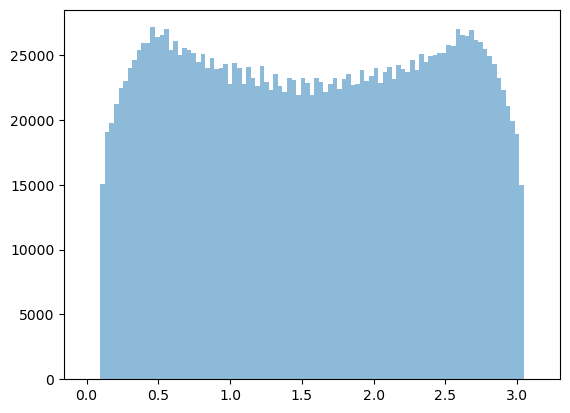

In [15]:
import numpy as np
import matplotlib.pyplot as plt
bins1 = np.linspace(0, np.pi, 100)
plt.hist(vectors.iloc[:,1], bins1, alpha=0.5, label='Calculated')

In [16]:
Ydata = np.array(tre.iloc[:,0])
Xdata = tre.loc[:,["pt1","pt2","l_pt","m_jlv","m_wwbb","MET"]]
Ytst = np.array(tste.iloc[:,0])
Xtst = tste.loc[:,["pt1","pt2","l_pt","m_jlv","m_wwbb","MET"]]

bdt = ensemble.AdaBoostClassifier(n_estimators = 10)
bdt = bdt.fit(Xdata, Ydata)

Ypred = bdt.predict(Xdata)
acc[i] = bdt.score(Xdata, Ydata)

NameError: name 'tre' is not defined